# Information
$Writer:{\;}Junhyuck{\;}Woo
\\ Std. ID: 20145337
\\ Project:{\;}Polynomial{\;}fitting$

# import library

In [1]:
import numpy as np; import matplotlib.pyplot as plt
import random; import math

# Function: Generate matrix

In [2]:
def generate_matrix(points, sample_number, order):
    matrix = np.zeros((sample_number, order+1), dtype=int)
    for i in range(sample_number):
        for j in range(order+1):
            matrix[i][j] = pow(points[i], j)
    return(np.asmatrix(matrix))

# Function: Generate Polynomial function

In [3]:
def generate_function(x, coefficient):
    y = 0
    coefficient = np.asarray(coefficient)
    for i in range(len(coefficient)):
        y += coefficient[i] * pow(x, i)
    return(y)

# Function: Calculate distance

In [4]:
def distance(x, y):
    d = (x-y)**2
    s = np.sum(d)
    r = np.sqrt(s)
    return(r)

# Define a polynomial curve
$f(x){\;}={\;}{3x}{\;}-{\;}{4}$

# Define a domain of the function.
$-50{\;} {\leqq}{\;}X{\;}{\leqq}{\;}50$

In [5]:
x = np.arange(-50, 50, 0.1)
y = 3*x - 4

# Generate noisy

In [6]:
e = np.int64(np.random.uniform(-150, 150, 50).astype(int))
point_x = np.int64(np.random.uniform(-50, 50, 50).astype(int))
point_noised = 3*point_x-4+e

# Plot the function.

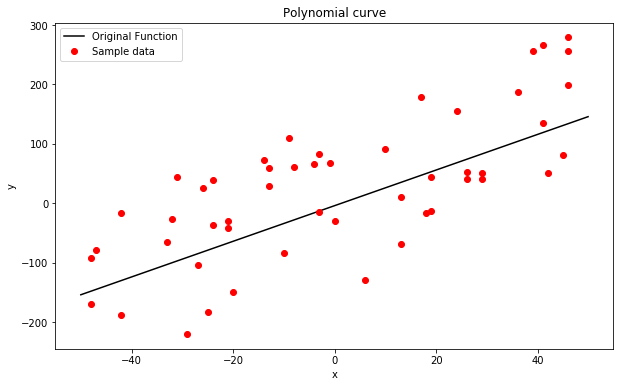

In [7]:
plt.figure(figsize=(10, 6));
plt.plot(x, y, color='black', label="Original Function"); 
plt.plot(point_x, point_noised, 'ro', label="Sample data");
plt.title('Polynomial curve'); plt.xlabel('x'); plt.ylabel('y');
plt.legend()

# Select a point within the domain.

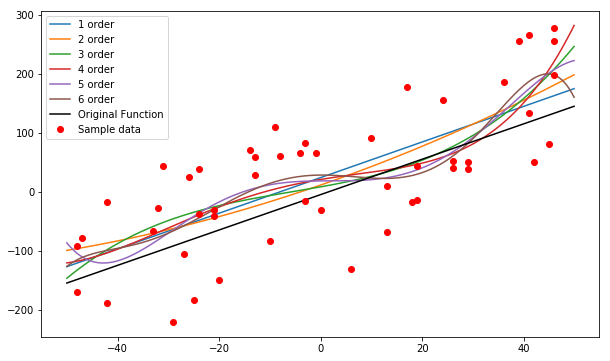

In [8]:
plt.figure(figsize=(10, 6));
estimated_y = []
functions = []
for i in range(6):
    i+=1
    matrix = generate_matrix(point_x, 50, i)
    pseudo_inverse_matrix = np.linalg.pinv(matrix)
    
    y2matrix = np.asmatrix(point_noised)
    coefficient = pseudo_inverse_matrix*np.matrix.transpose(y2matrix)
    
    function = generate_function(x, coefficient)
    estimation = generate_function(point_x, coefficient)
    
    functions.append(function)
    estimated_y.append(estimation)
    plt.plot(x,function, label=str(i)+" order")
    
plt.plot(x, y, color='black', label="Original Function"); 
plt.plot(point_x, point_noised, 'ro', label="Sample data");
plt.legend(loc="upper left")
plt.show()

# Energy Function

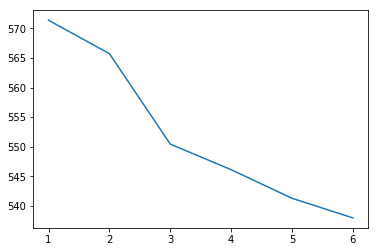

In [9]:
energy = []
degree = []
for i in range(6):
    degree.append(i+1)
    energy.append(distance(estimated_y[i], point_noised))
plt.plot(degree, energy, label="Energy")

# Plot graph saperately

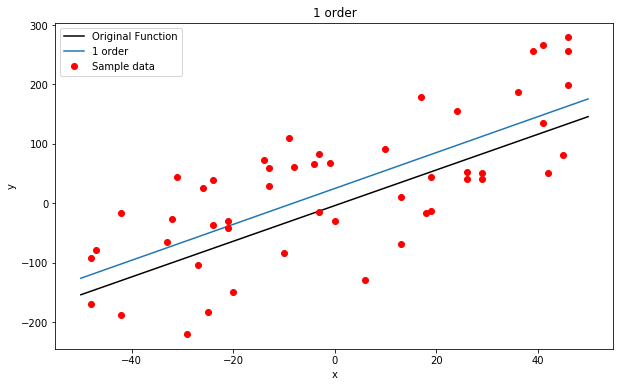

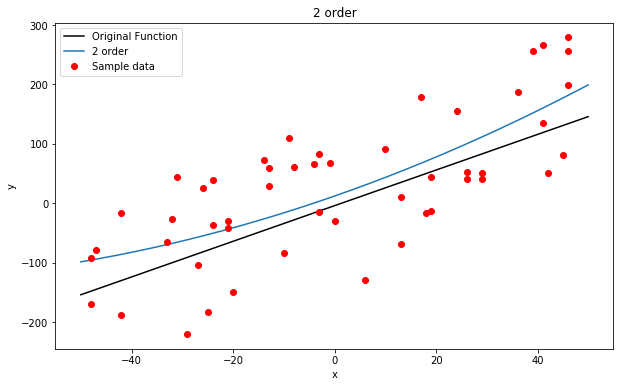

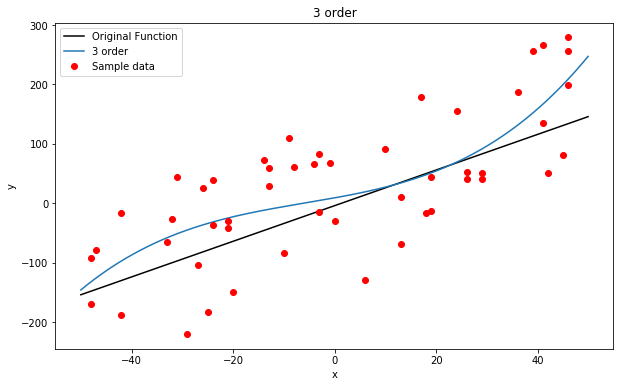

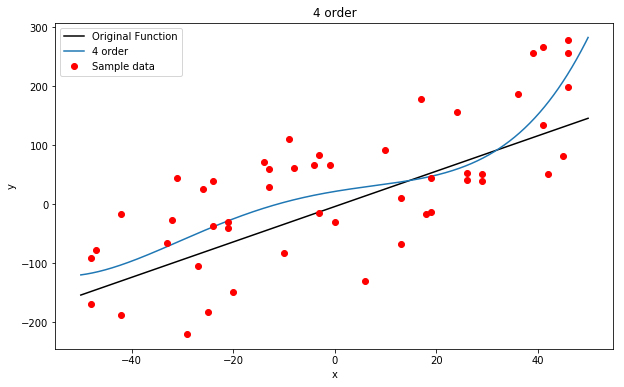

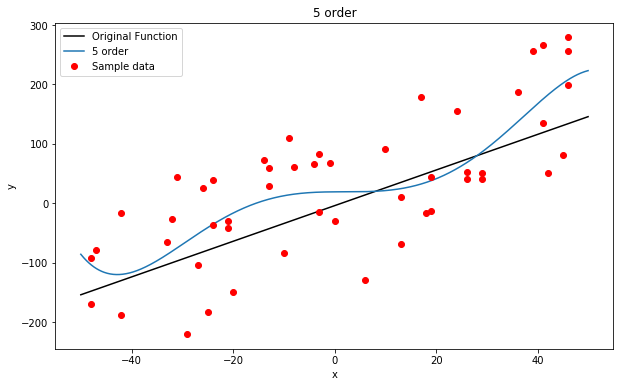

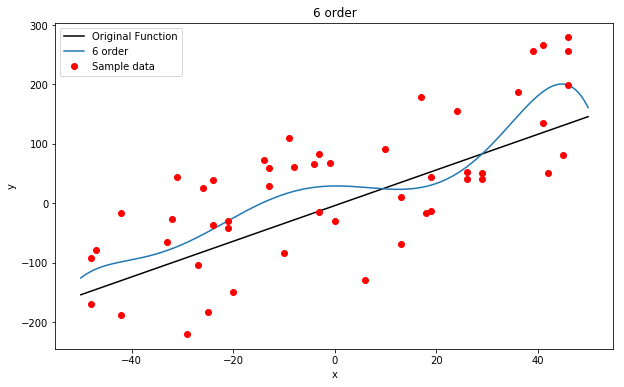

In [10]:
for i in range(6):
    plt.figure(figsize=(10, 6));
    plt.plot(x, y, label="Original Function", color="black")
    plt.plot(x, functions[i], label=str(i+1)+" order")
    plt.plot(point_x, point_noised, 'ro', label="Sample data");
    plt.legend(loc="upper left")
    plt.title(str(i+1) + ' order'); plt.xlabel('x'); plt.ylabel('y');
    plt.show()